In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Import transit demand and transit supply shapefile

In [33]:
#Import demand shapefile
demand = gpd.read_file("/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/houston_transit_demand.shp")
demand

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,percent_em,percent_ci,percent_en,percent_ol,percent_yo,percent_di,percent_tr,transit_de,quartile,geometry
0,48,201,341002,48201341002,3410.02,Census Tract 3410.02,G5020,S,1785065,0,...,0.223327,-0.954649,-0.678344,0.232259,-0.308873,0.416174,-0.497029,-3.278086,Low,"POLYGON ((-95.15404 29.55352, -95.15388 29.553..."
1,48,201,310101,48201310101,3101.01,Census Tract 3101.01,G5020,S,2195579,20698,...,1.749513,-0.995213,-0.774286,-1.013394,-1.458011,-1.243118,0.377626,-3.960569,Low,"POLYGON ((-95.35849 29.74977, -95.35784 29.750..."
2,48,201,510301,48201510301,5103.01,Census Tract 5103.01,G5020,S,1435445,30134,...,1.170803,-1.170738,-0.928724,0.169478,-0.772903,-0.427601,-0.681376,-4.989722,Low,"POLYGON ((-95.38810 29.77722, -95.38778 29.777..."
3,48,201,311001,48201311001,3110.01,Census Tract 3110.01,G5020,S,830347,25333,...,-1.414611,0.998945,1.960952,1.256624,-0.967991,-0.439465,0.534516,1.943688,Moderate-High,"POLYGON ((-95.31009 29.74334, -95.30991 29.743..."
4,48,201,233502,48201233502,2335.02,Census Tract 2335.02,G5020,S,1380711,0,...,-0.677399,-0.128888,0.901740,0.384903,-0.134011,0.312313,-0.681376,-0.667382,Moderate-Low,"POLYGON ((-95.25607 29.76793, -95.25185 29.767..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,48,201,250303,48201250303,2503.03,Census Tract 2503.03,G5020,S,2086010,6809,...,1.387499,-0.612098,-0.776769,-0.940418,-0.789256,0.968779,-0.681376,-2.913032,Low,"POLYGON ((-95.24970 29.95052, -95.24970 29.950..."
1105,48,201,250201,48201250201,2502.01,Census Tract 2502.01,G5020,S,4619977,13380,...,-0.500874,0.176049,-0.156928,-1.150080,1.742879,0.149821,-0.567373,1.262657,Moderate-High,"POLYGON ((-95.26833 29.94201, -95.26829 29.942..."
1106,48,201,532004,48201532004,5320.04,Census Tract 5320.04,G5020,S,1569963,31001,...,0.217632,1.049438,0.580998,-0.020281,0.053647,0.801205,-0.029534,6.238307,High,"POLYGON ((-95.47334 29.85794, -95.47314 29.857..."
1107,48,201,532003,48201532003,5320.03,Census Tract 5320.03,G5020,S,1010818,12188,...,1.353566,1.002412,0.689286,-1.000598,-2.038236,-0.253548,-0.681376,-0.578478,Moderate-Low,"POLYGON ((-95.48095 29.86575, -95.48038 29.865..."


In [34]:
#Import supply shapefile
supply = gpd.read_file("/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/houston_transit_supply.shp")
supply

,TRACTCE,ALAND,area,area_cover,service_co,routesum,bus_stops,density_bs,transit_su,quartile,geometry
0,310101,2195579,2.217311e+06,1.954668e+06,0.683591,-0.013652,29.0,0.623208,1.293146,Moderate-High,"POLYGON ((-10615258.438 3471424.851, -10615186..."
1,510301,1435445,1.466320e+06,1.392952e+06,0.935115,1.120303,15.0,0.207655,2.263074,High,"POLYGON ((-10618555.165 3474945.831, -10618518..."
2,311001,830347,8.560404e+05,8.224577e+05,0.974840,-0.439891,16.0,1.441678,1.976626,High,"POLYGON ((-10609870.464 3470601.201, -10609850..."
3,211302,1584213,1.584917e+06,1.453638e+06,0.814548,0.588041,36.0,2.028484,3.431073,High,"POLYGON ((-10612725.920 3474185.052, -10612634..."
4,100001,2550360,2.580593e+06,2.511420e+06,1.020519,12.723635,108.0,4.819537,18.563691,High,"POLYGON ((-10617052.129 3472431.021, -10617048..."
...,...,...,...,...,...,...,...,...,...,...,...
688,550308,1412829,1.413612e+06,6.518168e+05,-0.862145,-0.555338,4.0,-0.871628,-2.289111,Low,"POLYGON ((-10623886.478 3503019.496, -10623812..."
689,520603,353492,3.537148e+05,3.231993e+05,0.801898,-0.630243,2.0,-0.459660,-0.288005,Moderate-Low,"POLYGON ((-10629823.592 3479236.892, -10629696..."
690,521201,481055,4.813665e+05,4.396867e+05,0.800739,-0.624291,5.0,0.230613,0.407061,Moderate-High,"POLYGON ((-10631745.078 3479278.075, -10631669..."
691,532004,1569963,1.601924e+06,1.103814e+06,-0.024091,-0.526119,10.0,-0.373869,-0.924079,Moderate-Low,"POLYGON ((-10628043.927 3485302.907, -10628021..."


### Calculate transit desert scores 

In [ ]:
# Group the transit dependency scores into quartiles
demand['quartile_bins'] = pd.qcut(demand['transit_de'], 4, labels=['1', '2', '3', '4'])

In [ ]:
# Group the transit dependency scores into quartiles
supply['quartile_bins'] = pd.qcut(supply['transit_su'], 4, labels=['1', '2', '3', '4'])

In [37]:
demand['TRACTCE'] = demand['TRACTCE'].astype(int)

In [ ]:
# Merge the supply and demand gdfs on census tract id
gdf = pd.merge(supply, demand, left_on=['TRACTCE'], right_on=['TRACTCE'], how='inner')

In [39]:
# Rename geometry column
gdf = gdf.rename(columns={'geometry_x': 'geometry'})

In [ ]:
# Map the categorical data to numerical values and convert to float
print("---- Before ----")
print(gdf['quartile_bins_y'].dtype)
print(gdf['quartile_bins_x'].dtype)

gdf['quartile_bins_y'] = gdf['quartile_bins_y'].cat.codes.astype(float)
gdf['quartile_bins_x'] = gdf['quartile_bins_x'].cat.codes.astype(float)

print("---- After ----")
print(gdf['quartile_bins_y'].dtype)
print(gdf['quartile_bins_x'].dtype)

In [44]:
# Calculate demand - supply
gdf['transit_deserts'] = (gdf['quartile_bins_y'] - gdf['quartile_bins_x'])

In [ ]:
# Group the transit dependency scores into quartiles
gdf['transit_deserts_bins'] = pd.qcut(gdf['transit_deserts'], 4, labels=['Low', 'Moderate-Low', 'Moderate-High', 'High'])

### Plot transit demand, supply, and desert maps

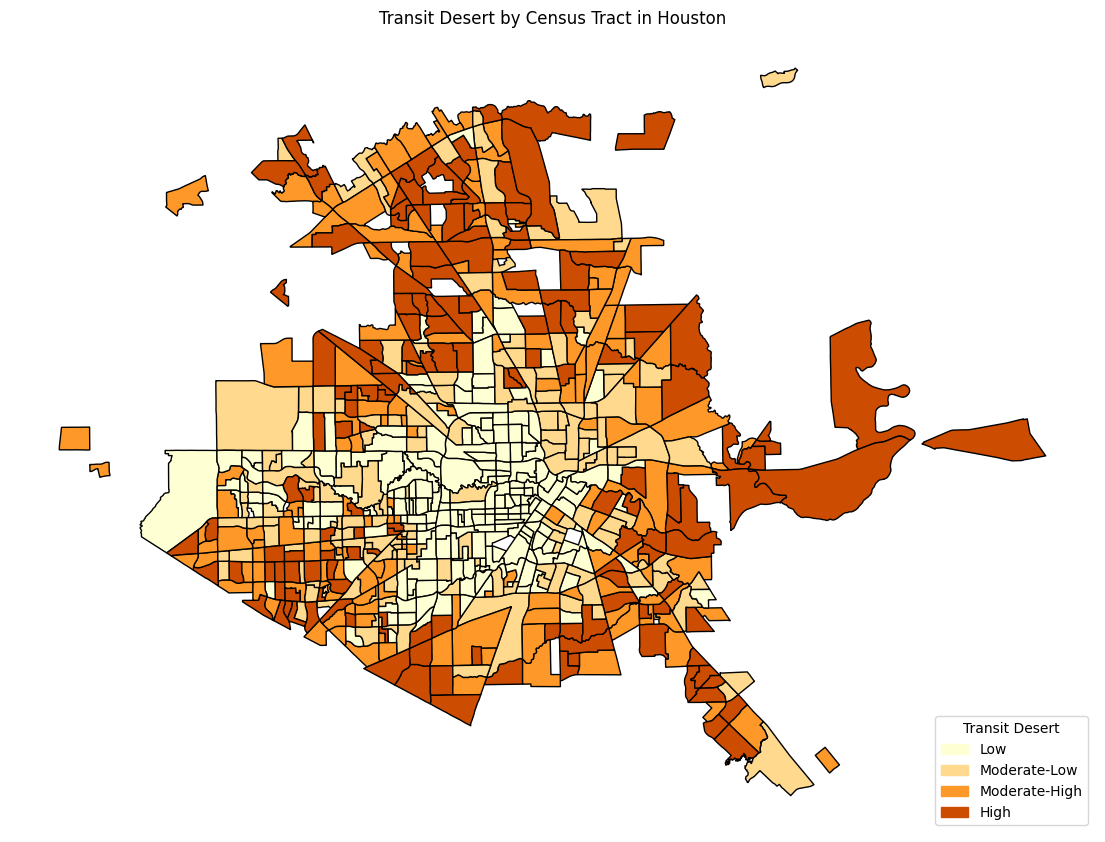

In [52]:
# Transit desert map

import matplotlib.patches as mpatches

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#ffffd4",
    'Moderate-Low': "#fed98e",
    'Moderate-High': "#fe9929",
    'High': "#cc4c02"
}

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Transit Desert"},
         color=[quartile_colors[q] for q in gdf['transit_deserts_bins']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Transit Desert', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Desert by Census Tract in Houston')
ax.set_axis_off()

# save plot
fig.savefig('/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/deserthouston.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

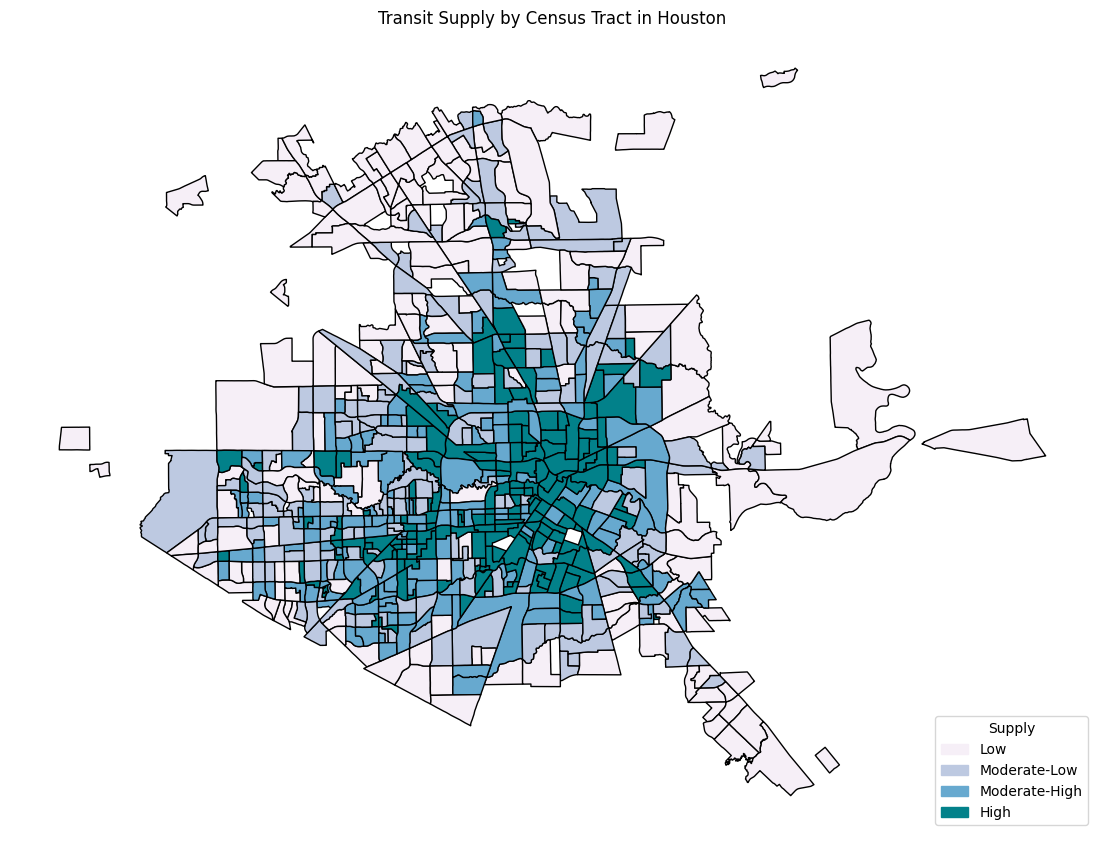

In [53]:
# Transit supply map

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#f6eff7",
    'Moderate-Low': "#bdc9e1",
    'Moderate-High': "#67a9cf",
    'High': "#02818a"
}
# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Transit Desert"},
         color=[quartile_colors[q] for q in gdf['quartile_x']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Supply', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Supply by Census Tract in Houston')
ax.set_axis_off()

# save plot
fig.savefig('/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/supplyhouston.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

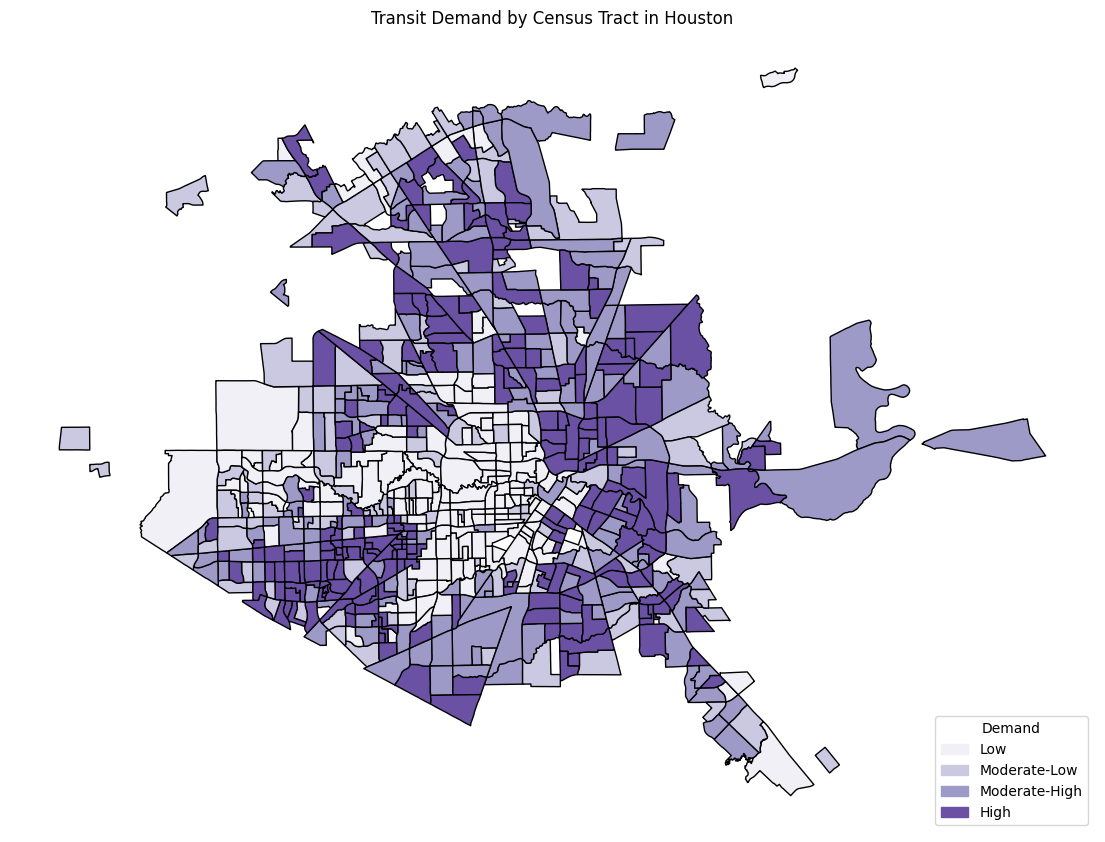

In [54]:
# Transit demand map

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#f2f0f7",
    'Moderate-Low': "#cbc9e2",
    'Moderate-High': "#9e9ac8",
    'High': "#6a51a3"
}
# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Demand"},
         color=[quartile_colors[q] for q in gdf['quartile_y']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Demand', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Demand by Census Tract in Houston')
ax.set_axis_off()

# save plot
fig.savefig('/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/demandhouston.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
